In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('M:/Data_Science_Project/ds/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df = df.rename(columns={'Reached.on.Time_Y.N':'Reachedontime_YN'})
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reachedontime_YN
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

In [5]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reachedontime_YN        int64
dtype: object

In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reachedontime_YN       0
dtype: int64

In [7]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reachedontime_YN
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
df = df.drop(['ID', 'Gender'], axis=1)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reachedontime_YN
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1


In [9]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
le = LabelEncoder()

In [10]:
df['Warehouse_block'] = le.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment'] = le.fit_transform(df['Mode_of_Shipment'])
df['Product_importance'] = le.fit_transform(df['Product_importance'])
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reachedontime_YN
0,3,0,4,2,177,3,1,44,1233,1
1,4,0,4,5,216,2,1,59,3088,1
2,0,0,2,2,183,4,1,48,3374,1
3,1,0,3,3,176,4,2,10,1177,1
4,2,0,2,2,184,3,2,46,2484,1


In [11]:
x = df.drop('Reachedontime_YN', axis=1)
x.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,44,1233
1,4,0,4,5,216,2,1,59,3088
2,0,0,2,2,183,4,1,48,3374
3,1,0,3,3,176,4,2,10,1177
4,2,0,2,2,184,3,2,46,2484


In [12]:
y = df['Reachedontime_YN']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reachedontime_YN, dtype: int64

In [13]:
y.value_counts()

1    6563
0    4436
Name: Reachedontime_YN, dtype: int64

# Without Sampling 

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

In [15]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier

In [16]:
linear = LogisticRegression(random_state=42)
sgd = SGDClassifier(random_state=42)
nb = GaussianNB()
svc = SVC(random_state=42)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=42) 
rfc = RandomForestClassifier(random_state=42)
bag = BaggingClassifier(random_state=42)
xg = XGBClassifier(random_state=42)

In [17]:
models = [linear, sgd, nb, svc, knn, dtc, rfc, bag, xg]

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve

The accuracy of model LogisticRegression is 0.64
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       873
           1       0.72      0.66      0.69      1327

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200

Confusion Metrics of LogisticRegression Model is 
 [[524 349]
 [449 878]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.59
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       873
           1       1.00      0.31      0.48      1327

    accuracy                           0.59      2200
   macro avg       0.74      0.66      0.57      2200
weighted avg       0.80      0.59      0.55      2200

Confusion Met

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.67
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       873
           1       0.74      0.68      0.71      1327

    accuracy                           0.67      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.68      0.67      0.67      2200

Confusion Metrics of KNeighborsClassifier Model is 
 [[559 314]
 [419 908]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.65
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       873
           1       0.71      0.70      0.70      1327

    accuracy                           0.65      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.65      0.65 

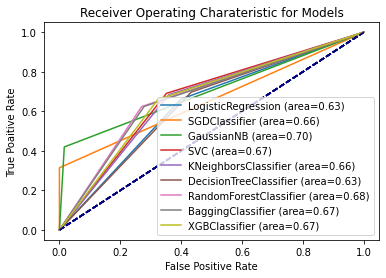

In [19]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    #plt.figure(figsize=(10,10))
    plt.plot(fpr,tpr,label=f'{type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# With Oversampling 

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
ros.fit(x,y)
x_sample, y_sample = ros.fit_resample(x,y)
y_sample.value_counts()

1    6563
0    6563
Name: Reachedontime_YN, dtype: int64

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x_sample, y_sample, train_size=0.8)

The accuracy of model LogisticRegression is 0.68
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.63      0.87      0.73      1308
           1       0.80      0.49      0.61      1318

    accuracy                           0.68      2626
   macro avg       0.71      0.68      0.67      2626
weighted avg       0.71      0.68      0.67      2626

Confusion Metrics of LogisticRegression Model is 
 [[1141  167]
 [ 669  649]]
--------------------------------------------------------------------




C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of model SGDClassifier is 0.50
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1308
           1       0.50      1.00      0.67      1318

    accuracy                           0.50      2626
   macro avg       0.25      0.50      0.33      2626
weighted avg       0.25      0.50      0.34      2626

Confusion Metrics of SGDClassifier Model is 
 [[   0 1308]
 [   0 1318]]
--------------------------------------------------------------------


The accuracy of model GaussianNB is 0.70
Classification Report of GaussianNB Model
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1308
           1       1.00      0.40      0.57      1318

    accuracy                           0.70      2626
   macro avg       0.81      0.70      0.67      2626
weighted avg       0.81      0.70      0.67      2626

Confusion Metrics of GaussianN

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.71
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1308
           1       0.75      0.61      0.68      1318

    accuracy                           0.71      2626
   macro avg       0.71      0.71      0.70      2626
weighted avg       0.71      0.71      0.70      2626

Confusion Metrics of KNeighborsClassifier Model is 
 [[1044  264]
 [ 510  808]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.74
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1308
           1       0.77      0.69      0.73      1318

    accuracy                           0.74      2626
   macro avg       0.74      0.74      0.74      2626
weighted avg       0.74      0.74      0

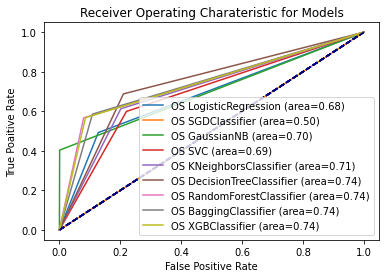

In [22]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.plot(fpr,tpr,label=f'OS {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    ##plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# UnderSampling 

In [23]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
rus.fit(x,y)
xsample_us, ysample_us = rus.fit_resample(x,y)
ysample_us.value_counts()

1    4436
0    4436
Name: Reachedontime_YN, dtype: int64

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(xsample_us, ysample_us, train_size=0.8)

The accuracy of model LogisticRegression is 0.68
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       898
           1       0.77      0.51      0.61       877

    accuracy                           0.68      1775
   macro avg       0.70      0.68      0.67      1775
weighted avg       0.70      0.68      0.67      1775

Confusion Metrics of LogisticRegression Model is 
 [[765 133]
 [432 445]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.69
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.63      0.94      0.75       898
           1       0.88      0.43      0.58       877

    accuracy                           0.69      1775
   macro avg       0.75      0.69      0.67      1775
weighted avg       0.75      0.69      0.67      1775

Confusion Met

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.69
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.66      0.78      0.72       898
           1       0.73      0.59      0.65       877

    accuracy                           0.69      1775
   macro avg       0.70      0.69      0.69      1775
weighted avg       0.70      0.69      0.69      1775

Confusion Metrics of KNeighborsClassifier Model is 
 [[704 194]
 [358 519]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.64
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       898
           1       0.63      0.67      0.65       877

    accuracy                           0.64      1775
   macro avg       0.64      0.64      0.64      1775
weighted avg       0.64      0.64      0.64 

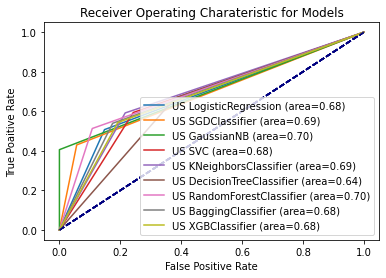

In [25]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.plot(fpr,tpr,label=f'US {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    ##plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# Synthetic Minority OverSampling (SMOTE)

In [26]:
from imblearn.over_sampling import SMOTE
smot = SMOTE()
smot.fit(x,y)
xsample_s, ysample_s = smot.fit_resample(x,y)
ysample_s.value_counts()

1    6563
0    6563
Name: Reachedontime_YN, dtype: int64

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(xsample_s, ysample_s, train_size=0.8)

The accuracy of model LogisticRegression is 0.68
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      1289
           1       0.78      0.52      0.63      1337

    accuracy                           0.68      2626
   macro avg       0.70      0.68      0.67      2626
weighted avg       0.71      0.68      0.67      2626

Confusion Metrics of LogisticRegression Model is 
 [[1089  200]
 [ 636  701]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.51
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.71      0.02      0.04      1289
           1       0.51      0.99      0.68      1337

    accuracy                           0.51      2626
   macro avg       0.61      0.51      0.36      2626
weighted avg       0.61      0.51      0.36      2626

Confusion

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.72
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.68      0.84      0.75      1289
           1       0.79      0.61      0.69      1337

    accuracy                           0.72      2626
   macro avg       0.74      0.73      0.72      2626
weighted avg       0.74      0.72      0.72      2626

Confusion Metrics of KNeighborsClassifier Model is 
 [[1077  212]
 [ 515  822]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.68
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1289
           1       0.68      0.68      0.68      1337

    accuracy                           0.68      2626
   macro avg       0.68      0.68      0.68      2626
weighted avg       0.68      0.68      0

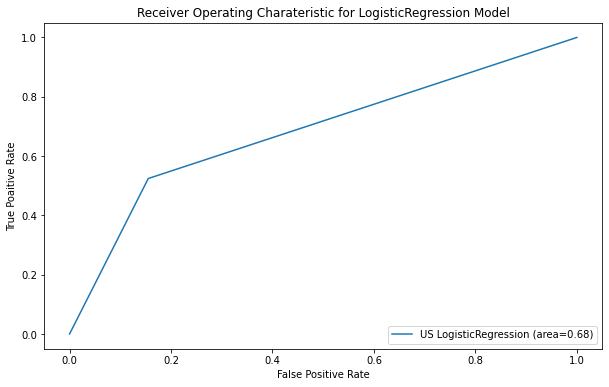

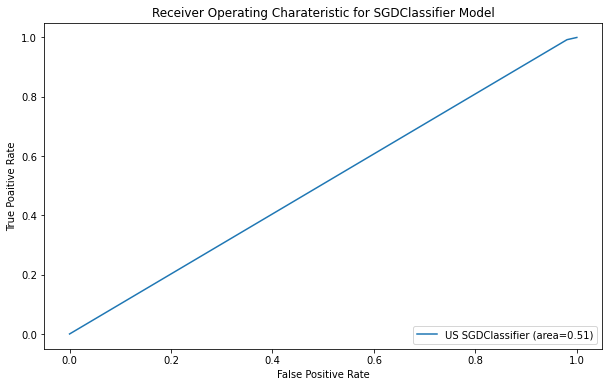

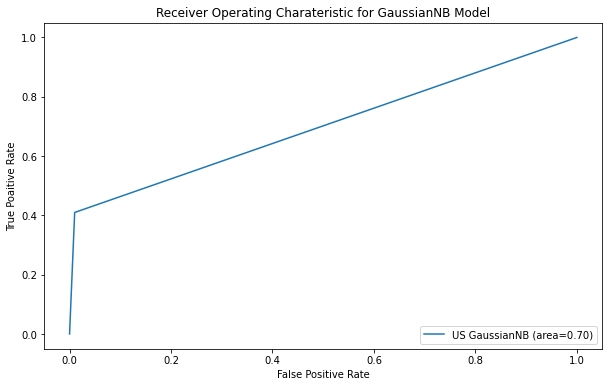

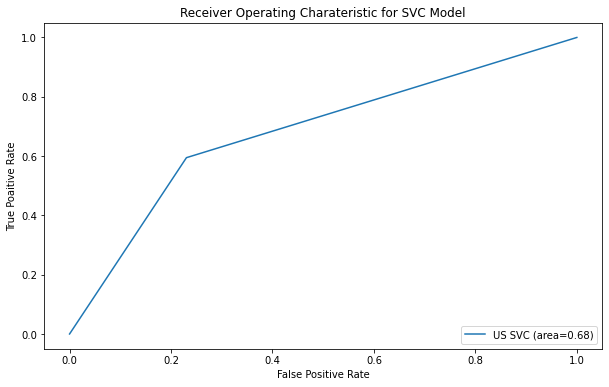

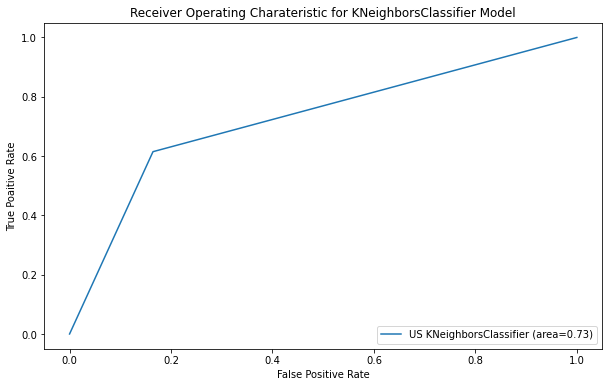

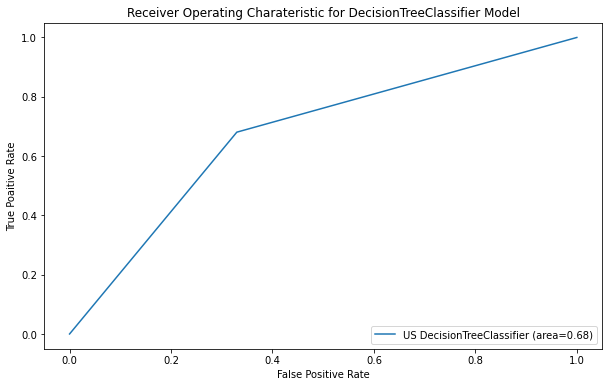

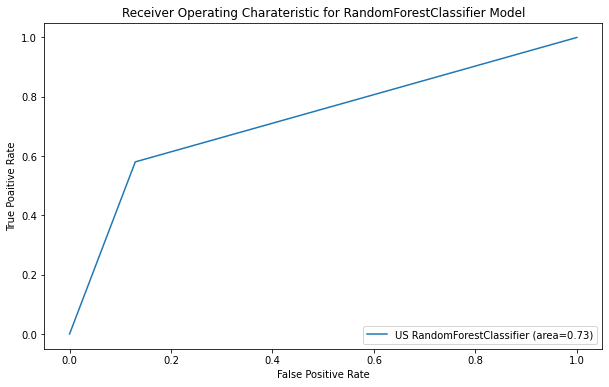

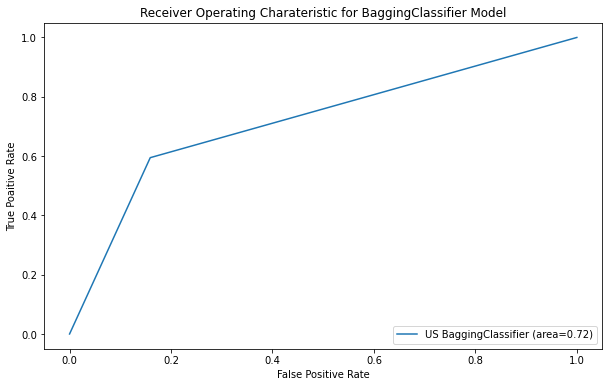

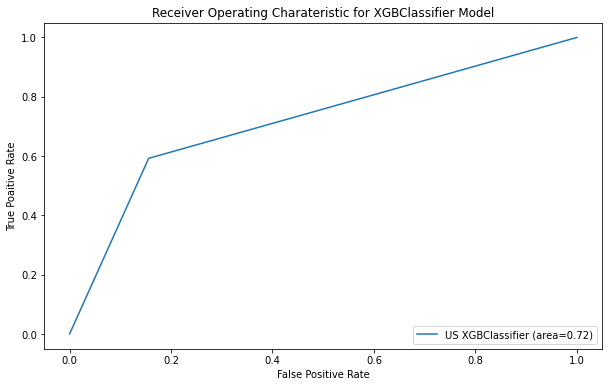

In [28]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label=f'US {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot(color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    #plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# Edited Nearest Neighbour 

In [29]:
from imblearn.under_sampling import EditedNearestNeighbours
edit = EditedNearestNeighbours()
edit.fit(x,y)
xsample_en, ysample_en = edit.fit_resample(x,y)
ysample_en.value_counts()

0    4436
1    3318
Name: Reachedontime_YN, dtype: int64

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(xsample_en, ysample_en, train_size=0.8)

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of model LogisticRegression is 0.90
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       857
           1       0.97      0.81      0.88       694

    accuracy                           0.90      1551
   macro avg       0.92      0.89      0.90      1551
weighted avg       0.91      0.90      0.90      1551

Confusion Metrics of LogisticRegression Model is 
 [[841  16]
 [135 559]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.87
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       857
           1       1.00      0.71      0.83       694

    accuracy                           0.87      1551
   macro avg       0.90      0.85      0.86      1551
weighted avg       0.89      0.87      0.86      1551

Confusion Met

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.96
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       857
           1       0.97      0.93      0.95       694

    accuracy                           0.96      1551
   macro avg       0.96      0.96      0.96      1551
weighted avg       0.96      0.96      0.96      1551

Confusion Metrics of KNeighborsClassifier Model is 
 [[840  17]
 [ 46 648]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.93
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       857
           1       0.92      0.93      0.92       694

    accuracy                           0.93      1551
   macro avg       0.93      0.93      0.93      1551
weighted avg       0.93      0.93      0.93 

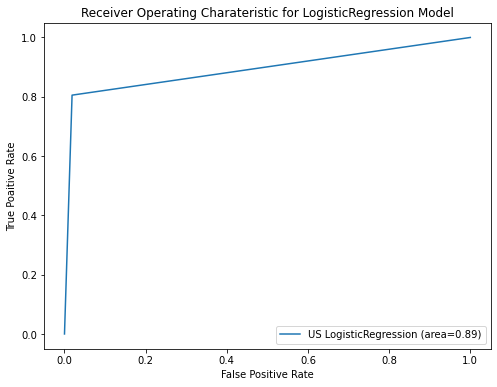

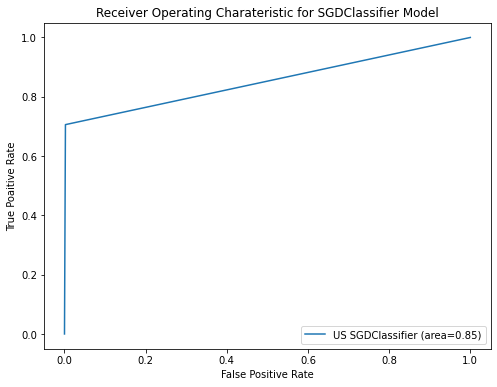

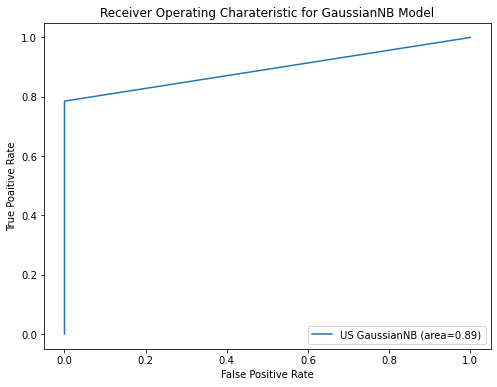

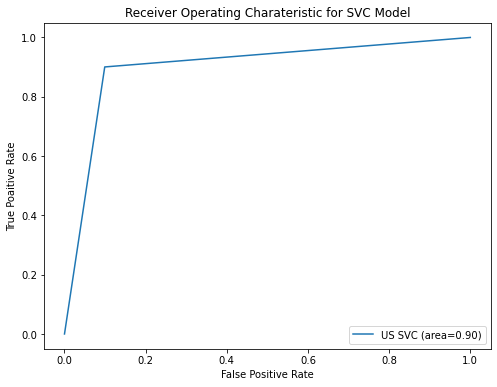

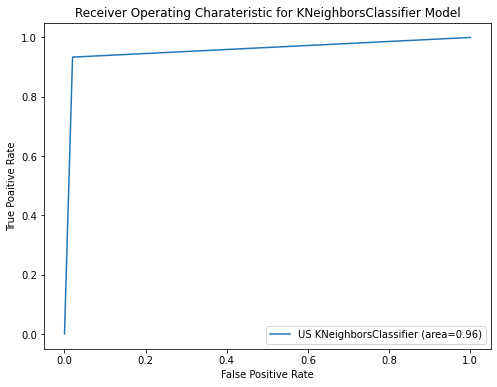

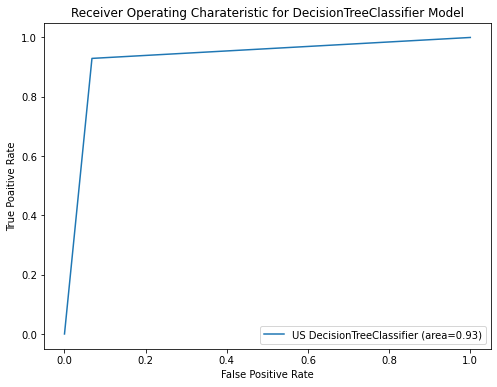

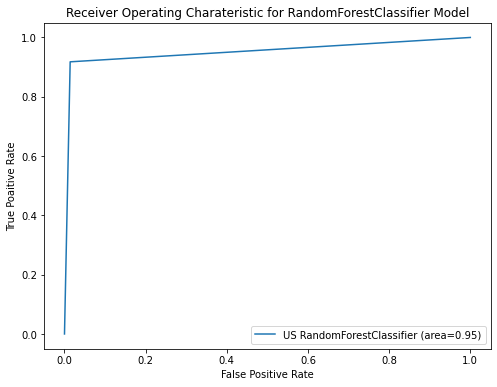

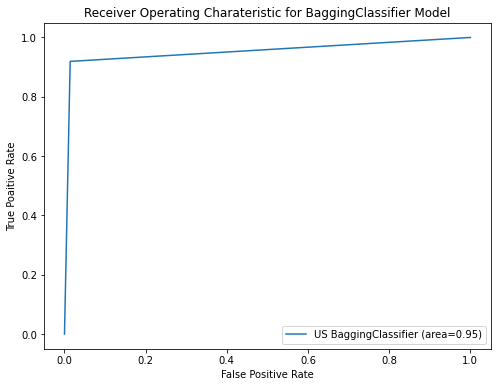

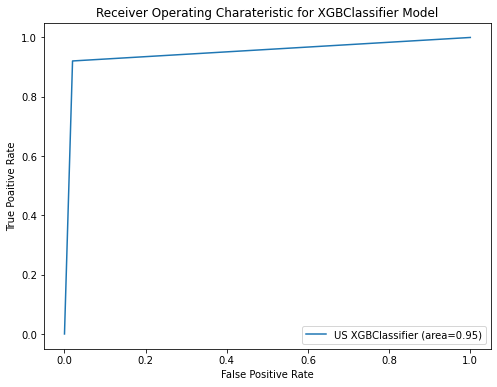

In [31]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label=f'US {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot(color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    #plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# Combination of ENN and SMOTE

In [32]:
from imblearn.combine import SMOTEENN
sm_enn = SMOTEENN()
sm_enn.fit(x,y)
xsample_se, ysample_se = sm_enn.fit_resample(x,y)
ysample_se.value_counts()

1    3284
0    2956
Name: Reachedontime_YN, dtype: int64

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of model LogisticRegression is 0.90
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       857
           1       0.97      0.81      0.88       694

    accuracy                           0.90      1551
   macro avg       0.92      0.89      0.90      1551
weighted avg       0.91      0.90      0.90      1551

Confusion Metrics of LogisticRegression Model is 
 [[841  16]
 [135 559]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.87
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       857
           1       1.00      0.71      0.83       694

    accuracy                           0.87      1551
   macro avg       0.90      0.85      0.86      1551
weighted avg       0.89      0.87      0.86      1551

Confusion Met

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.96
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       857
           1       0.97      0.93      0.95       694

    accuracy                           0.96      1551
   macro avg       0.96      0.96      0.96      1551
weighted avg       0.96      0.96      0.96      1551

Confusion Metrics of KNeighborsClassifier Model is 
 [[840  17]
 [ 46 648]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.93
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       857
           1       0.92      0.93      0.92       694

    accuracy                           0.93      1551
   macro avg       0.93      0.93      0.93      1551
weighted avg       0.93      0.93      0.93 

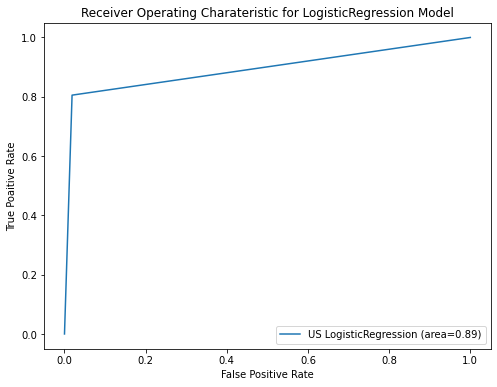

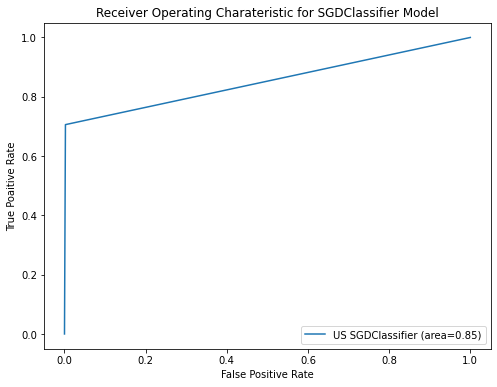

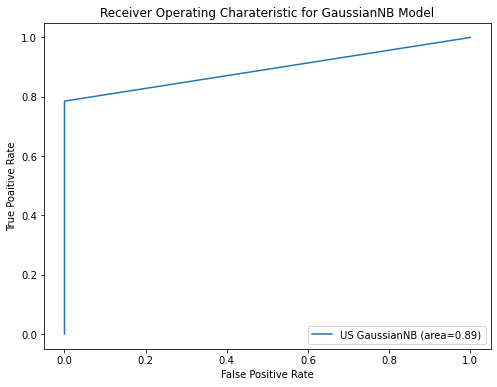

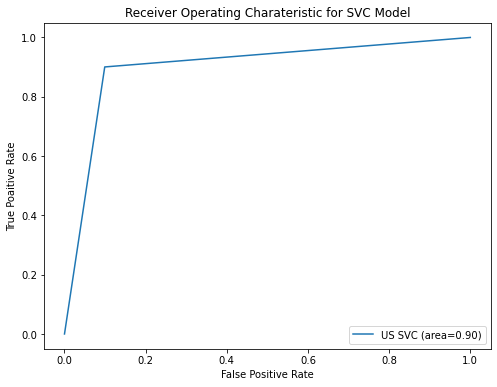

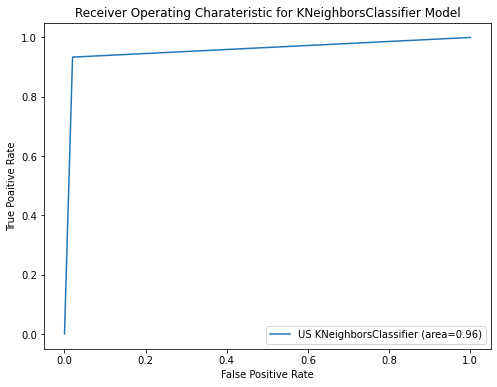

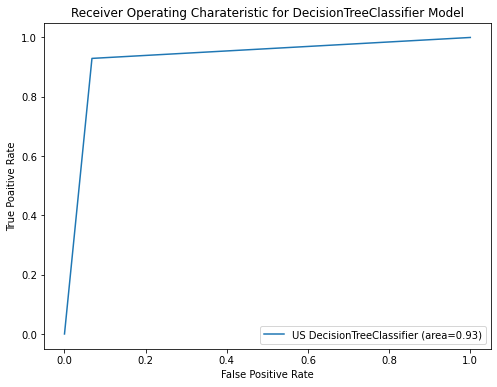

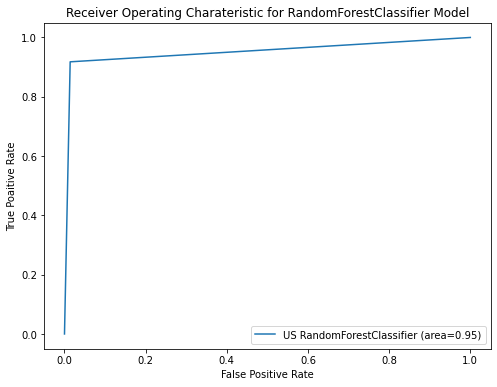

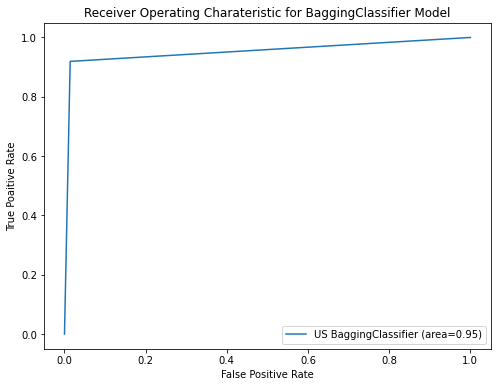

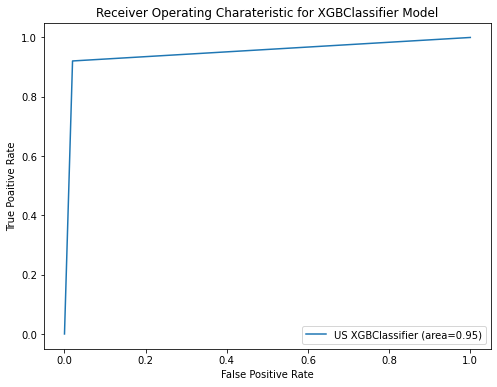

In [33]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label=f'US {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot(color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    #plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# Combination With Robust Scaling and Without Sampling 

In [36]:
rs.fit(x)
rs_data = rs.transform(x)
pd.DataFrame(rs_data).shape

(10999, 9)

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(rs_data, y,train_size=0.8)

The accuracy of model LogisticRegression is 0.63
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       908
           1       0.69      0.67      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200

Confusion Metrics of LogisticRegression Model is 
 [[514 394]
 [426 866]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.65
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.55      0.87      0.67       908
           1       0.84      0.49      0.62      1292

    accuracy                           0.65      2200
   macro avg       0.70      0.68      0.65      2200
weighted avg       0.72      0.65      0.64      2200

Confusion Met

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.63
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       908
           1       0.69      0.66      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200

Confusion Metrics of KNeighborsClassifier Model is 
 [[520 388]
 [433 859]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.65
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.57      0.58      0.57       908
           1       0.70      0.70      0.70      1292

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65 

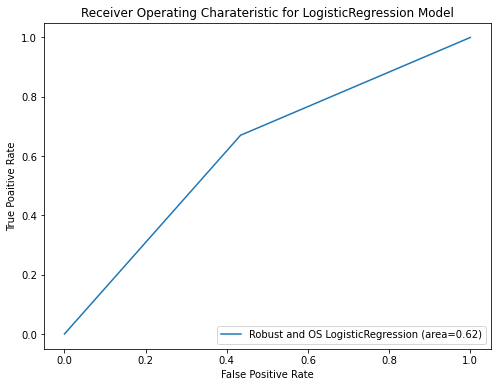

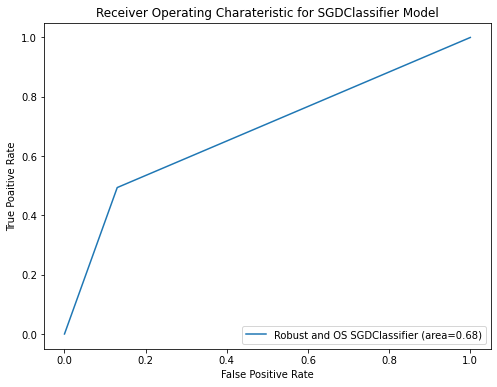

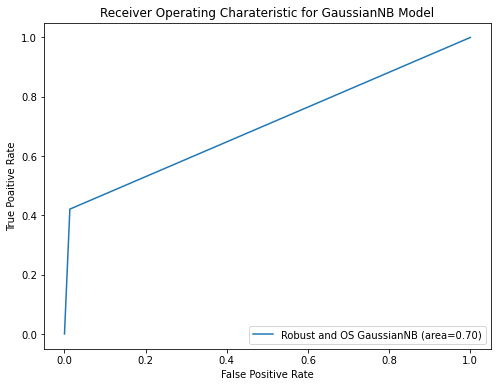

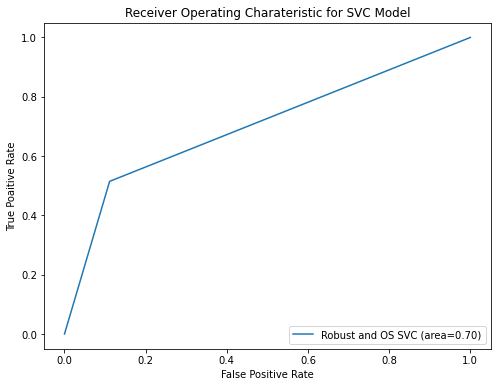

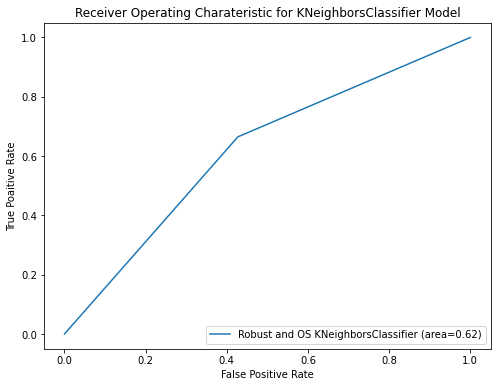

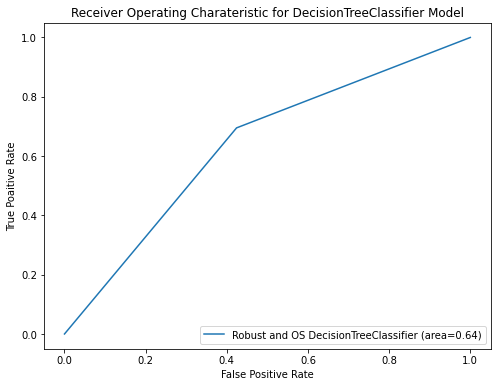

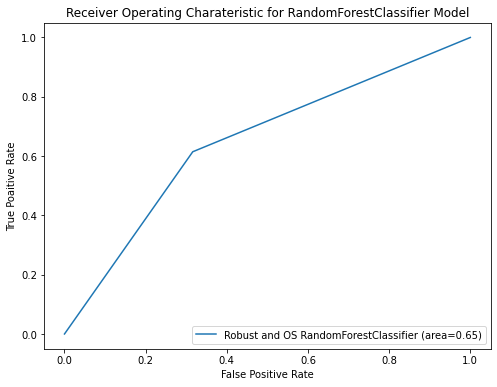

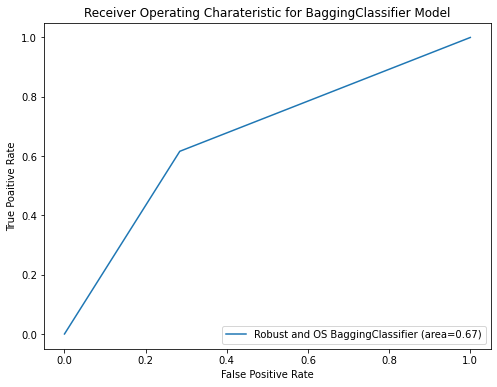

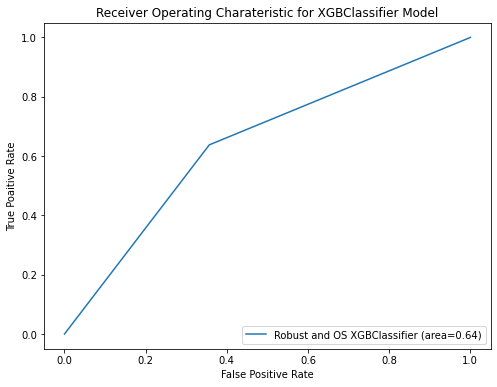

In [38]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label=f'Robust and OS {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot(color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    #plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# Combination With Robust scaling and OverSampling

In [39]:
rs = RobustScaler()
rs.fit(x_sample)
rs_data = rs.transform(x_sample)
rs_data

array([[ 0.        , -2.        ,  0.        , ...,  0.        ,
         6.16666667, -0.93493679],
       [ 0.33333333, -2.        ,  0.        , ...,  0.        ,
         8.66666667, -0.36293555],
       [-1.        , -2.        , -1.        , ...,  0.        ,
         6.83333333, -0.27474561],
       ...,
       [ 0.        , -2.        , -1.        , ...,  0.        ,
         0.5       ,  0.36478569],
       [ 0.33333333,  0.        ,  0.5       , ...,  0.        ,
        -0.5       ,  0.45297564],
       [ 0.33333333,  0.        ,  0.        , ...,  1.        ,
        -0.66666667, -0.85260561]])

In [40]:
pd.DataFrame(rs_data).shape

(13126, 9)

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(rs_data, y_sample,train_size=0.8)

The accuracy of model LogisticRegression is 0.68
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.64      0.85      0.73      1319
           1       0.77      0.52      0.62      1307

    accuracy                           0.68      2626
   macro avg       0.70      0.68      0.67      2626
weighted avg       0.70      0.68      0.67      2626

Confusion Metrics of LogisticRegression Model is 
 [[1118  201]
 [ 633  674]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.70
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.63      0.93      0.75      1319
           1       0.86      0.46      0.60      1307

    accuracy                           0.70      2626
   macro avg       0.75      0.69      0.68      2626
weighted avg       0.75      0.70      0.68      2626

Confusion

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.68
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1319
           1       0.72      0.58      0.65      1307

    accuracy                           0.68      2626
   macro avg       0.69      0.68      0.68      2626
weighted avg       0.69      0.68      0.68      2626

Confusion Metrics of KNeighborsClassifier Model is 
 [[1022  297]
 [ 543  764]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.73
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1319
           1       0.75      0.69      0.72      1307

    accuracy                           0.73      2626
   macro avg       0.73      0.73      0.73      2626
weighted avg       0.73      0.73      0

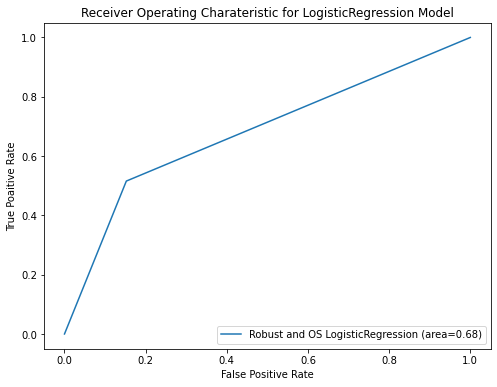

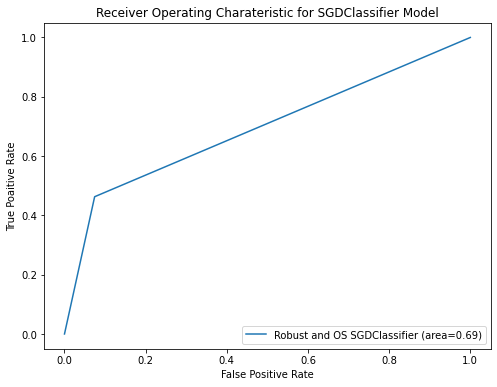

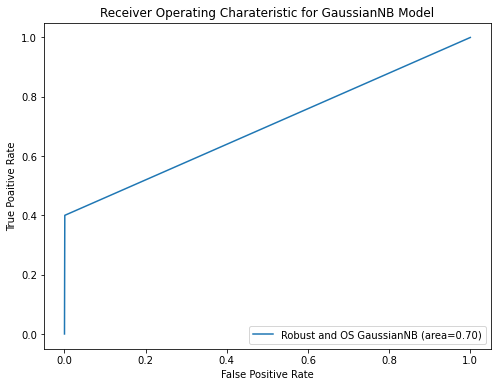

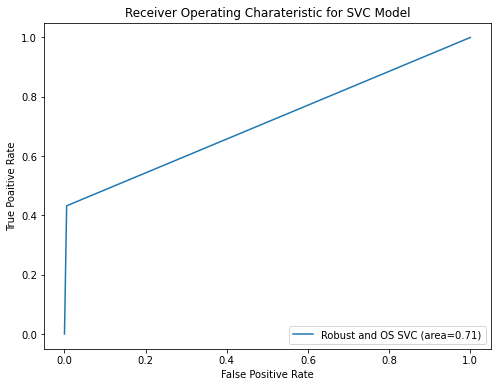

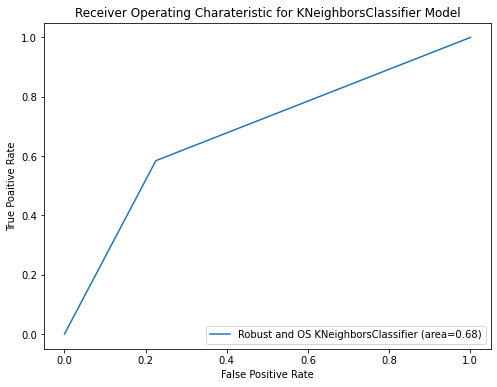

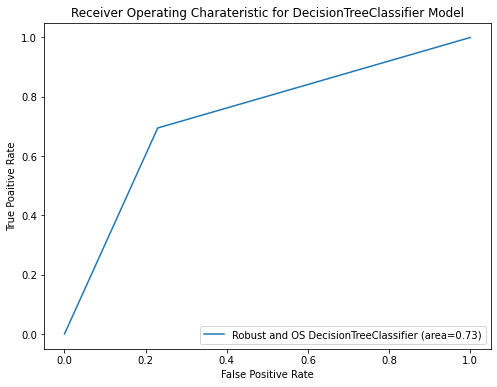

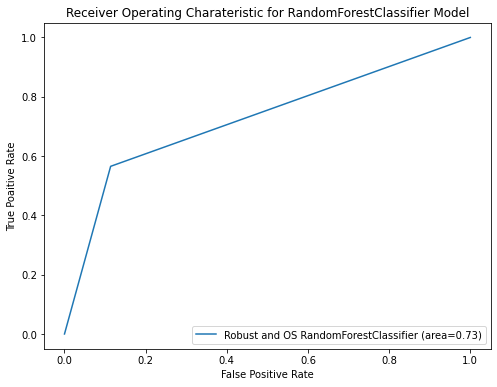

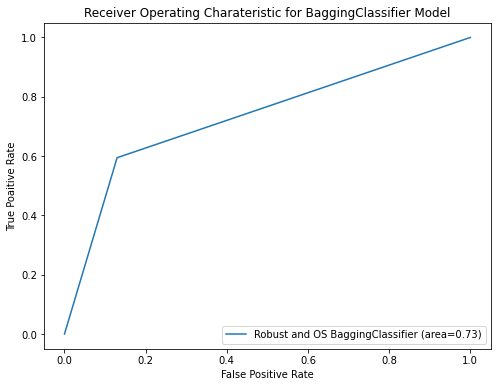

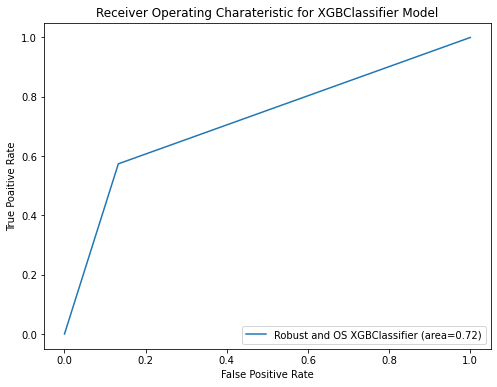

In [42]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label=f'Robust and OS {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot(color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    #plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# Robust Scaling and Undersampling 

In [43]:
rs.fit(xsample_us)
rs_data = rs.transform(xsample_us)
pd.DataFrame(rs_data).shape

(8872, 9)

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(rs_data, ysample_us, train_size=0.8)

The accuracy of model LogisticRegression is 0.65
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.61      0.83      0.70       881
           1       0.73      0.47      0.58       894

    accuracy                           0.65      1775
   macro avg       0.67      0.65      0.64      1775
weighted avg       0.67      0.65      0.64      1775

Confusion Metrics of LogisticRegression Model is 
 [[728 153]
 [470 424]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.65
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.61      0.84      0.71       881
           1       0.75      0.47      0.58       894

    accuracy                           0.65      1775
   macro avg       0.68      0.65      0.64      1775
weighted avg       0.68      0.65      0.64      1775

Confusion Met

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.65
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       881
           1       0.71      0.52      0.60       894

    accuracy                           0.65      1775
   macro avg       0.66      0.65      0.65      1775
weighted avg       0.66      0.65      0.65      1775

Confusion Metrics of KNeighborsClassifier Model is 
 [[690 191]
 [428 466]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.64
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       881
           1       0.65      0.63      0.64       894

    accuracy                           0.64      1775
   macro avg       0.64      0.64      0.64      1775
weighted avg       0.64      0.64      0.64 

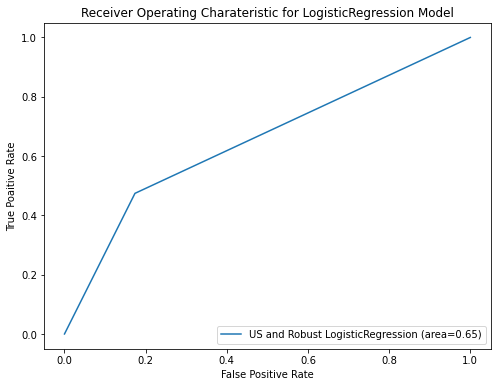

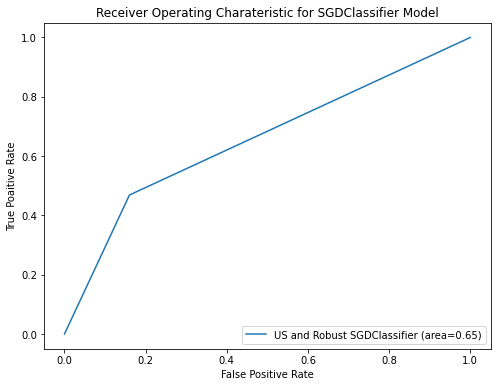

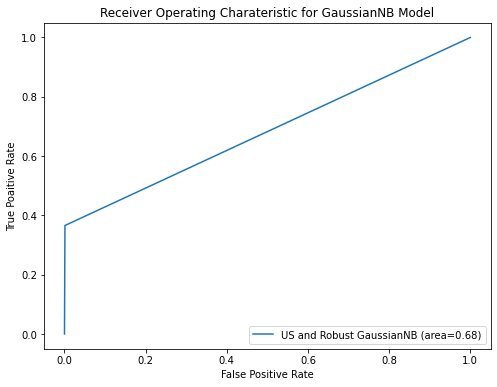

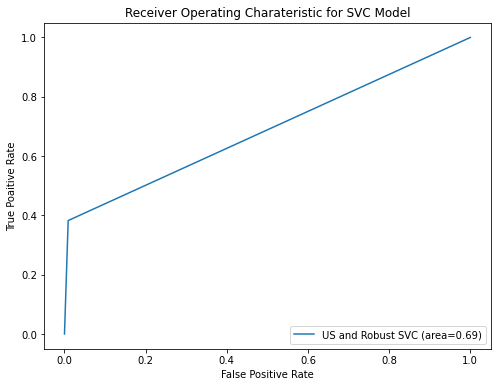

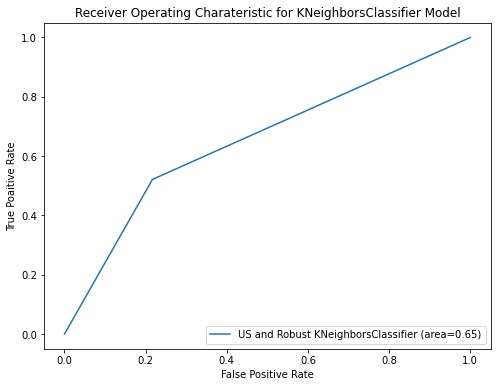

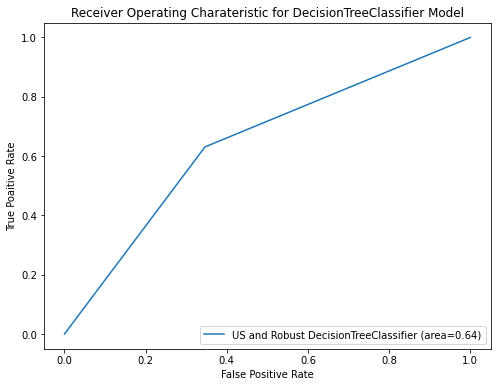

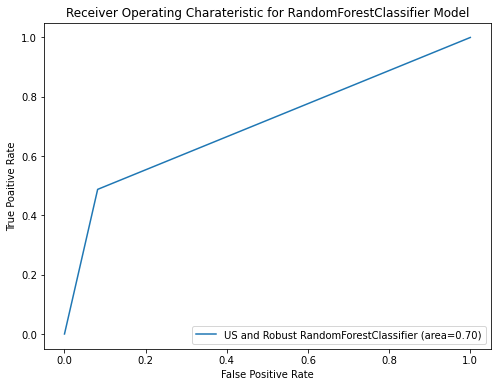

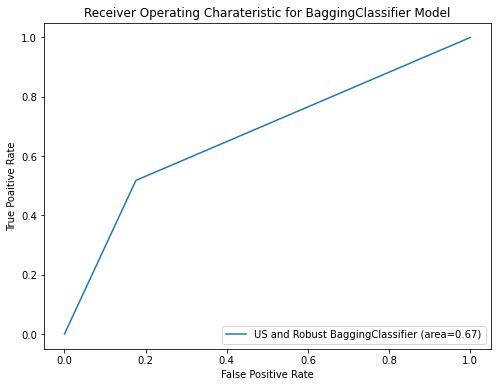

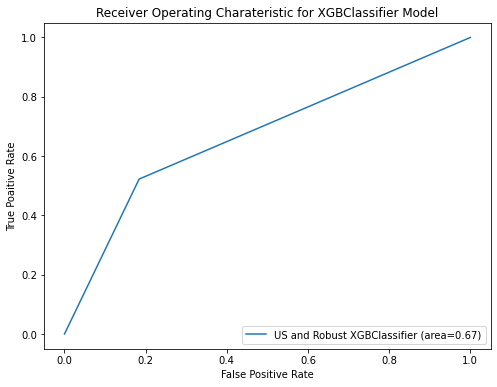

In [45]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label=f'US and Robust {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot(color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    #plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# Robust scaling and SMOTE

In [46]:
rs.fit(xsample_s)
rs_data = rs.transform(xsample_s)
pd.DataFrame(rs_data).shape

(13126, 9)

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(rs_data, ysample_s, train_size=0.8)

The accuracy of model LogisticRegression is 0.67
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.63      0.82      0.71      1310
           1       0.74      0.52      0.61      1316

    accuracy                           0.67      2626
   macro avg       0.68      0.67      0.66      2626
weighted avg       0.69      0.67      0.66      2626

Confusion Metrics of LogisticRegression Model is 
 [[1074  236]
 [ 637  679]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.66
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.62      0.81      0.71      1310
           1       0.73      0.51      0.60      1316

    accuracy                           0.66      2626
   macro avg       0.68      0.66      0.65      2626
weighted avg       0.68      0.66      0.65      2626

Confusion

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.69
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1310
           1       0.74      0.59      0.66      1316

    accuracy                           0.69      2626
   macro avg       0.70      0.69      0.69      2626
weighted avg       0.70      0.69      0.69      2626

Confusion Metrics of KNeighborsClassifier Model is 
 [[1035  275]
 [ 534  782]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.68
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1310
           1       0.68      0.68      0.68      1316

    accuracy                           0.68      2626
   macro avg       0.68      0.68      0.68      2626
weighted avg       0.68      0.68      0

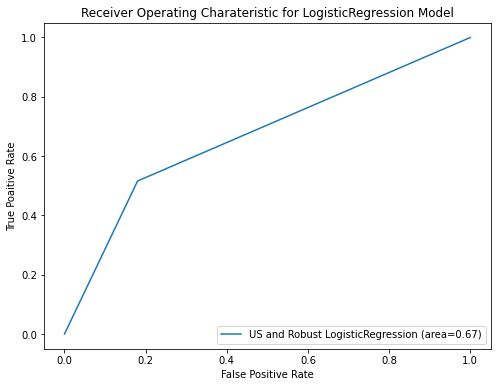

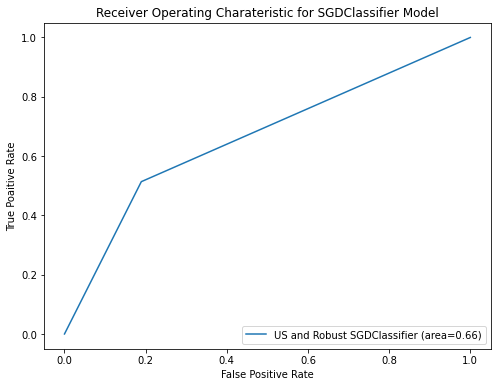

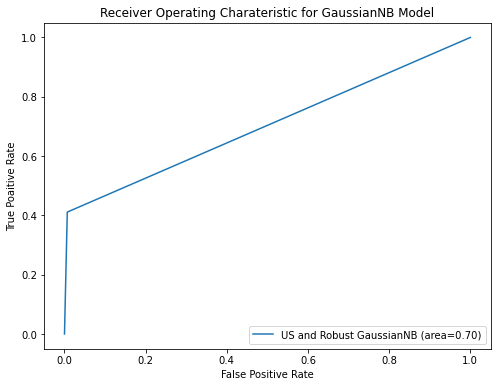

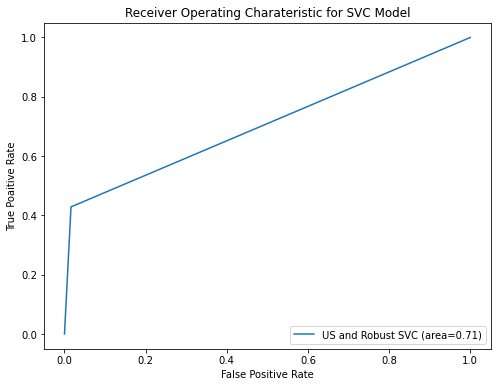

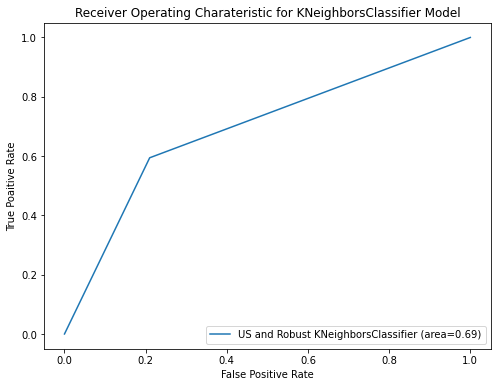

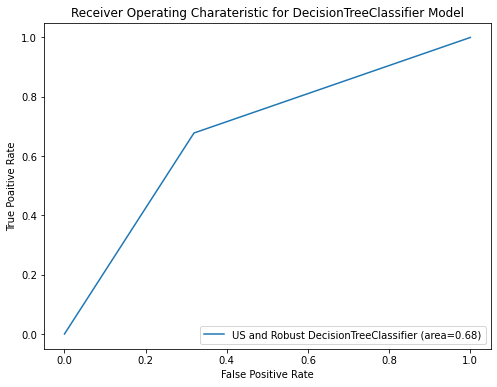

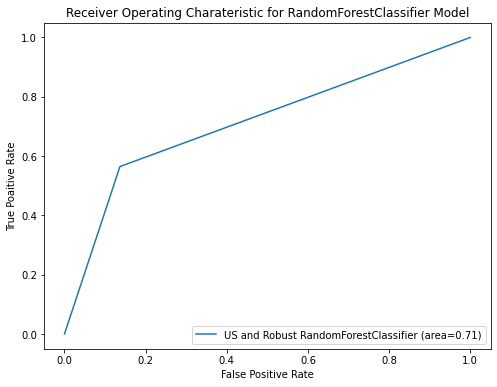

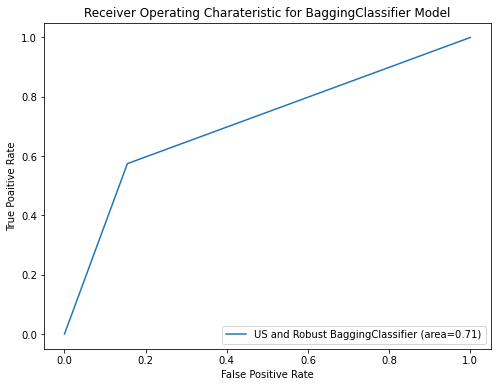

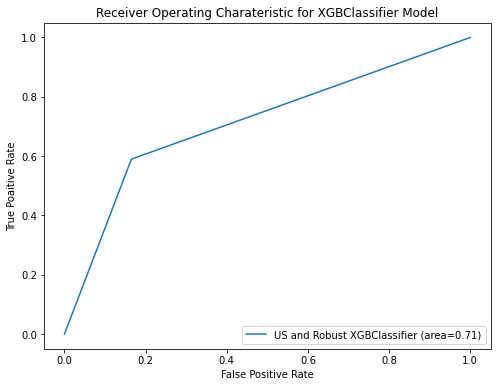

In [48]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label=f'US and Robust {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot(color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    #plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

# ROBUST Scaling and ENN

In [49]:
rs.fit(xsample_en)
rs_data = rs.transform(xsample_en)
pd.DataFrame(rs_data).shape

(7754, 9)

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(rs_data, ysample_en, train_size=0.8)

The accuracy of model LogisticRegression is 0.90
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       905
           1       0.96      0.80      0.87       646

    accuracy                           0.90      1551
   macro avg       0.92      0.89      0.90      1551
weighted avg       0.91      0.90      0.90      1551

Confusion Metrics of LogisticRegression Model is 
 [[886  19]
 [131 515]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.90
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       905
           1       0.95      0.80      0.87       646

    accuracy                           0.90      1551
   macro avg       0.91      0.88      0.89      1551
weighted avg       0.90      0.90      0.90      1551

Confusion Met

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.90
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       905
           1       0.96      0.80      0.87       646

    accuracy                           0.90      1551
   macro avg       0.92      0.89      0.90      1551
weighted avg       0.91      0.90      0.90      1551

Confusion Metrics of KNeighborsClassifier Model is 
 [[883  22]
 [127 519]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.92
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       905
           1       0.90      0.90      0.90       646

    accuracy                           0.92      1551
   macro avg       0.92      0.92      0.92      1551
weighted avg       0.92      0.92      0.92 

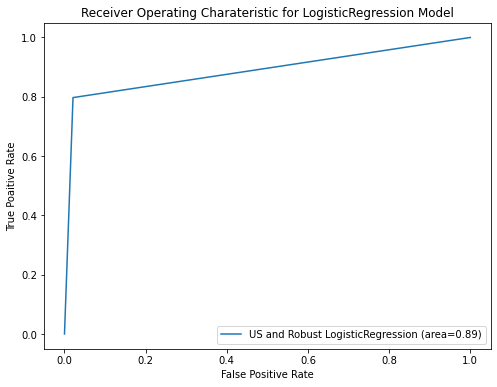

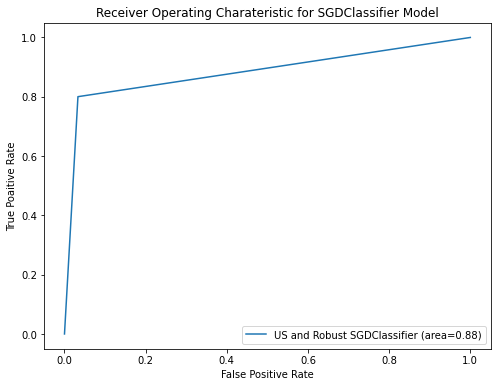

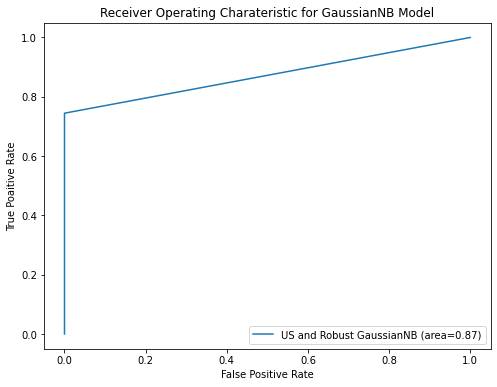

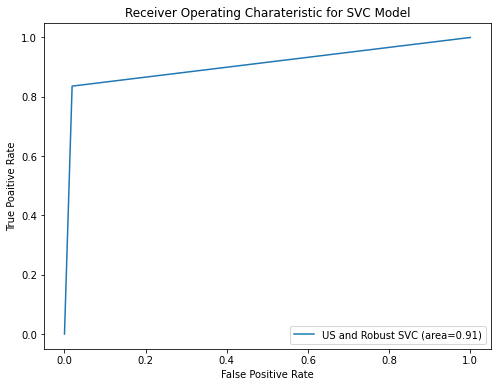

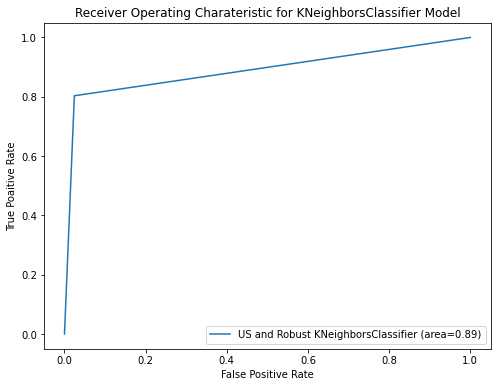

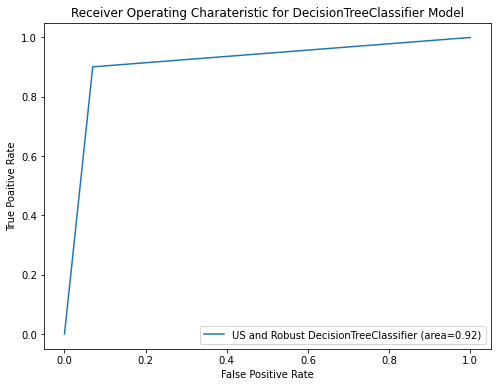

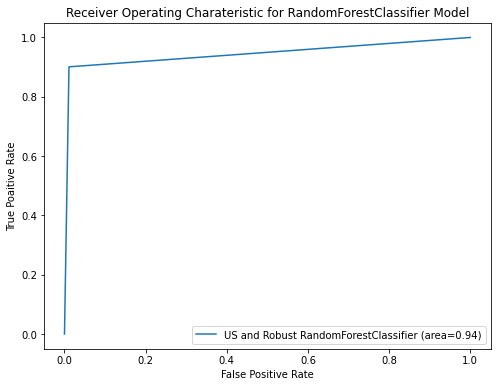

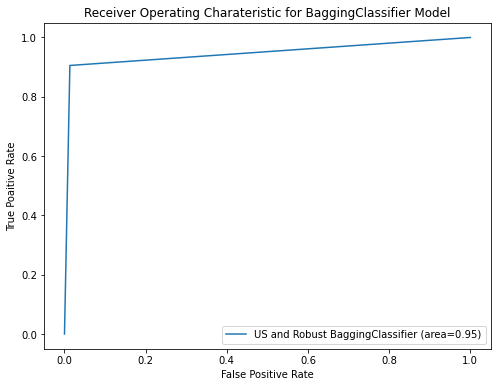

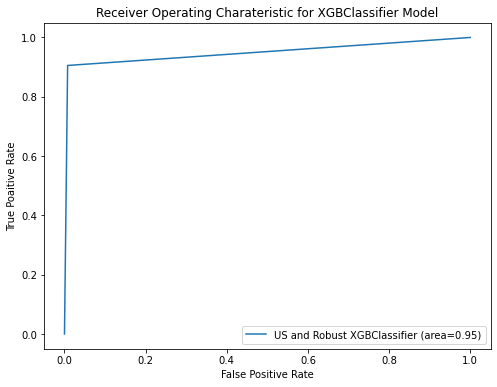

In [51]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label=f'US and Robust {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot(color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    #plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")

In [52]:
# Robust with ENN + SMOTE
rs.fit(xsample_se)
rs_data = rs.transform(xsample_se)
pd.DataFrame(rs_data).shape

(6240, 9)

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(rs_data, ysample_se, train_size=0.8)

The accuracy of model LogisticRegression is 0.90
Classification Report of LogisticRegression Model
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       589
           1       0.97      0.84      0.90       659

    accuracy                           0.90      1248
   macro avg       0.91      0.90      0.90      1248
weighted avg       0.91      0.90      0.90      1248

Confusion Metrics of LogisticRegression Model is 
 [[571  18]
 [106 553]]
--------------------------------------------------------------------


The accuracy of model SGDClassifier is 0.90
Classification Report of SGDClassifier Model
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       589
           1       0.96      0.84      0.90       659

    accuracy                           0.90      1248
   macro avg       0.90      0.90      0.90      1248
weighted avg       0.91      0.90      0.90      1248

Confusion Met

C:\Users\Shreyash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The accuracy of model KNeighborsClassifier is 0.92
Classification Report of KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       589
           1       0.98      0.87      0.92       659

    accuracy                           0.92      1248
   macro avg       0.93      0.93      0.92      1248
weighted avg       0.93      0.92      0.92      1248

Confusion Metrics of KNeighborsClassifier Model is 
 [[578  11]
 [ 85 574]]
--------------------------------------------------------------------


The accuracy of model DecisionTreeClassifier is 0.93
Classification Report of DecisionTreeClassifier Model
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       589
           1       0.94      0.93      0.94       659

    accuracy                           0.93      1248
   macro avg       0.93      0.93      0.93      1248
weighted avg       0.93      0.93      0.93 

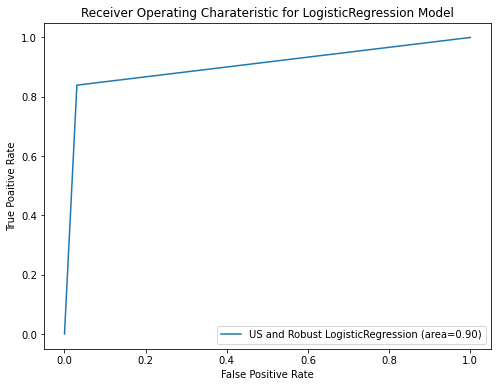

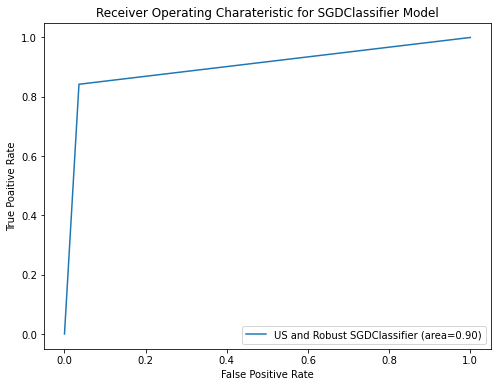

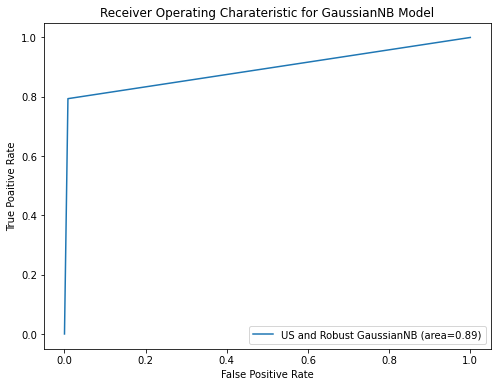

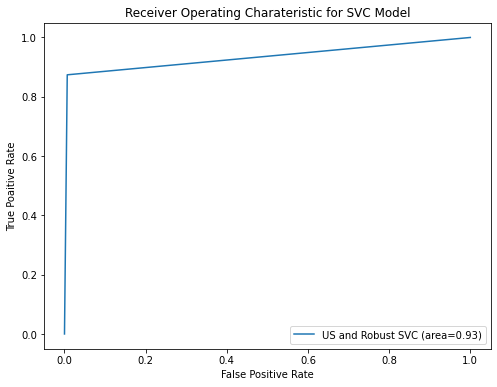

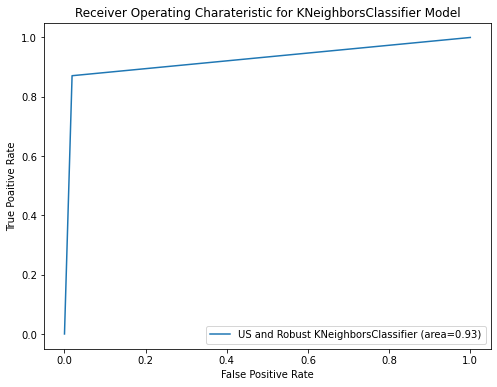

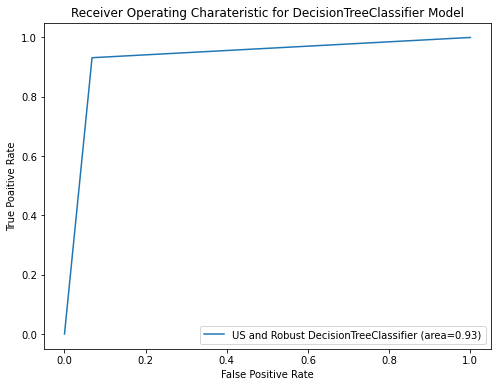

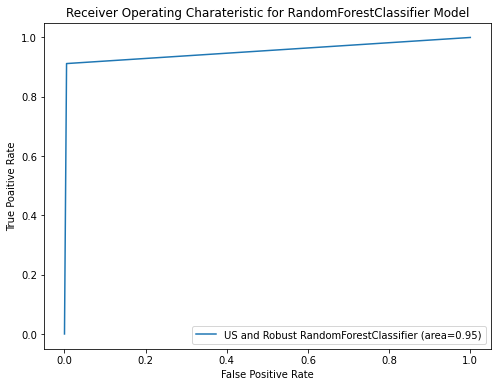

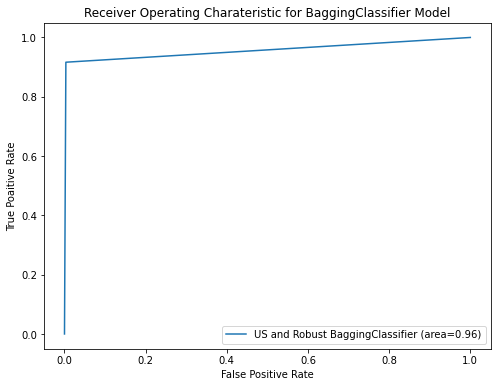

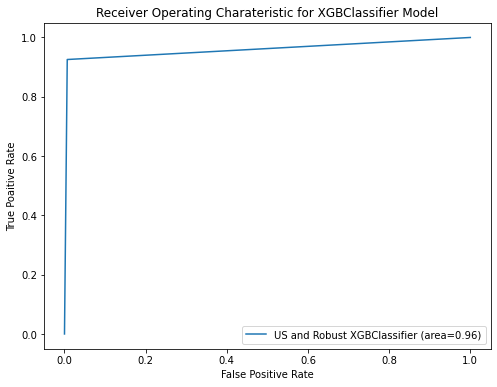

In [54]:
for model in models:
    model.fit(xtrain, ytrain) 
    ypred= model.predict(xtest) 
    accuracy= accuracy_score(ytest, ypred) 
    clf_report= classification_report(ytest, ypred) 
    con_matrix = confusion_matrix(ytest, ypred)
    fpr,tpr,thrsould = roc_curve(ytest,ypred)
    roc_auc = auc(fpr,tpr)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f'Classification Report of {type(model).__name__} Model')
    print(clf_report)
    print(f'Confusion Metrics of {type(model).__name__} Model is \n', con_matrix )
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label=f'US and Robust {type(model).__name__} (area=%0.2f)'%roc_auc)
    plt.plot(color='navy',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poaitive Rate')
    plt.title(f'Receiver Operating Charateristic for {type(model).__name__} Model')
    #plt.title(f'Receiver Operating Charateristic for Models')
    plt.legend(loc='lower right')
    print('--------------------------------------------------------------------')
    print("\n")